In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

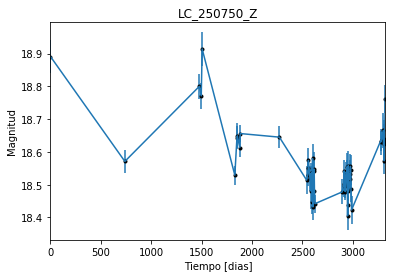

In [2]:
data = np.genfromtxt('LC_250750_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_250750_Z')
plt.savefig("LC_250750_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

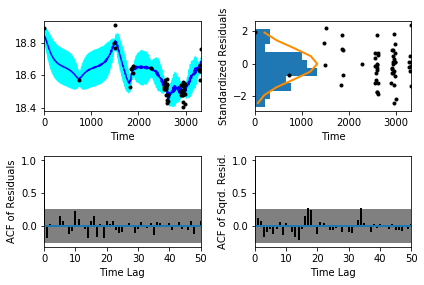

In [5]:
sample.assess_fit()

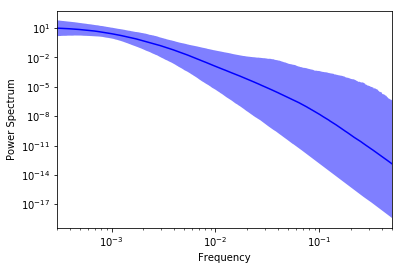

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

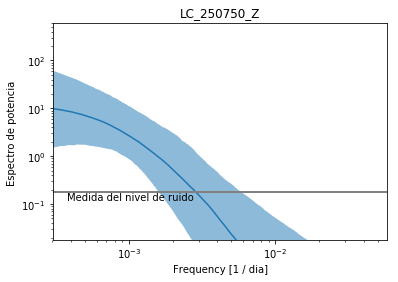

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_250750_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_250750_Z')

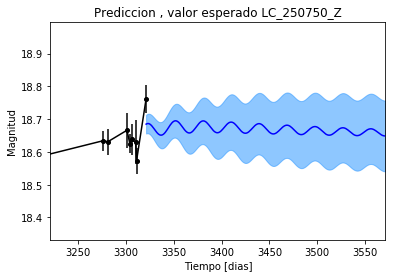

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_250750_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_250750_Z')

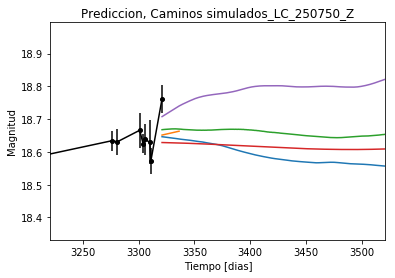

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_250750_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


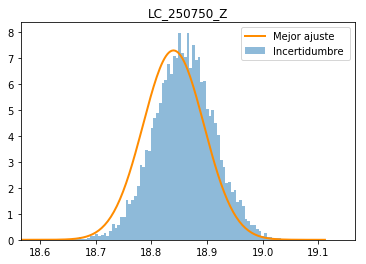

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_250750_Z')
plt.savefig("Mejor_ajuste_LC_250750_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_250750_Z')

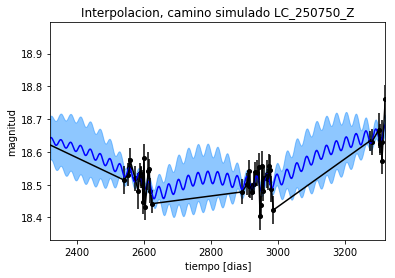

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_250750_Z')

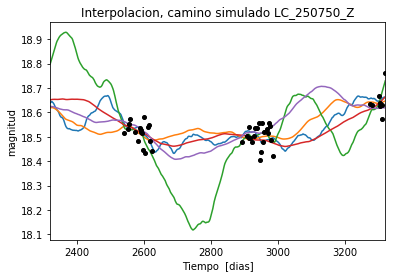

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 544.53753514
Median: 0.0095945850153
Standard deviation: 0.195348075027
68% credibility interval: [ 0.00085827  0.16395917]
95% credibility interval: [  3.59839562e-04   8.02082708e-01]
99% credibility interval: [  3.14795814e-04   9.71058046e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 783.690440951
Median: 0.00155320003087
Standard deviation: 0.0707355956182
68% credibility interval: [ 0.00048128  0.01782252]
95% credibility interval: [ 0.00032696  0.18902719]
99% credibility interval: [  3.04735678e-04   5.59588957e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 400.390155133
Median: 0.0173666682421
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1450.68901041
Median: 104.287969619
Standard deviation: 1.51553701041
68% credibility interval: [ 102.60358236  105.35597767]
95% credibility interval: [ 100.1395712   106.02419489]
99% credibility interval: [  98.23970536  106.42606775]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 726.078951915
Median: 0.688906212058
Standard deviation: 2.02683658976
68% credibility interval: [ 0.05498566  3.62529977]
95% credibility interval: [ 0.01373308  6.69836513]
99% credibility interval: [ 0.00951495  9.25934215]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 560.716690569
Median: 0.189068114008
Standard deviation: 6.89899844128
68% credibility interval: [ 0.01128282  3.38850004]
95% credibility interval: [  5.33453087e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5047.00110794
Median: 2.29730726911e-37
Standard deviation: 1.12587046973e+145
68% credibility interval: [  1.23842531e-66   1.16591090e-09]
95% credibility interval: [  1.21727408e-96   9.72435835e+55]
99% credibility interval: [  3.79099045e-103   3.62007452e+121]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2815.02562326
Median: 18.6566491797
Standard deviation: 0.0804466571539
68% credibility interval: [ 18.59540516  18.72907779]
95% credibility interval: [ 18.52143211  18.83798801]
99% credibility interval: [ 18.40674443  18.94203607]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 339.625333332
Median: 0.00190582426528
Standard deviation: 0.189364966851
68% credibility interval: [ 0.         0.1680748]
95% credibility interval: [ 0.          0.75895013]
99% credibility interval: [ 0.          0.94706872]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 339.625333332
Median: 0.00190582426528
Standard deviation: 0.189364966851
68% credibility interval: [ 0.         0.1680748]
95% credibility interval: [ 0.          0.75895013]
99% credibility interval: [ 0.          0.94706872]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 686.026810385
Median: 0.0
Standard deviation: 0.000395012162322
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1450.68901041
Median: 104.287969619
Standard deviation: 1.51553701041
68% credibility interval: [ 102.60358236  105.35597767]
95% credibility interval: [ 100.1395712   106.02419489]
99% credibility interval: [  98.23970536  106.42606775]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3195.71214909
Median: 0.0205210969828
Standard deviation: 0.0303220225897
68% credibility interval: [ 0.01178337  0.04165022]
95% credibility interval: [ 0.00740534  0.09361476]
99% credibility interval: [ 0.00574642  0.18924523]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1029.4073611
Median: 1.2422931797
Standard deviation: 0.199844927551
68% credibility interval: [ 1.0594449  1.4493757]
95% credibility interval: [ 0.88928499  1.67560531]
99% credibility interval: [ 0.74986712  1.83127678]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 680.413591309
Median: 3.09646047601e-05
Standard deviation: 0.0729407459292
68% credibility interval: [  6.38492796e-07   1.60738773e-03]
95% credibility interval: [  3.49369583e-49   4.03190770e-02]
99% credibility interval: [  2.87024448e-123   2.59602326e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 544.53753514
Median: (-0.0602845555966+0j)
Standard deviation: 1.70944170268
68% credibility interval: [-1.03018586-2.94090758j -0.00539265-0.01498089j]
95% credibility interval: [ -5.03963429e+00+0.j         -2.26093865e-03-0.1269577j]
99% credibility interval: [ -6.10133765e+00+0.j          -1.97792043e-03-0.01778209j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 783.690440951
Median: (-0.00975904361308+0.362429474659j)
Standard deviation: 1.27011471356
68% credibility interval: [-0.11198222+0.10216759j -0.00302397+0.j        ]
95% credibility interval: [-1.18769284+4.15758174j -0.00205434+0.j        ]
99% credibility interval: [ -3.51600111e+00+1.80574734j  -1.91471073e-03+0.j        ]
Posterior summary for param